In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
from wrangle import wrangle_zillow

In [2]:
df = wrangle_zillow()

In [3]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1581400 entries, 1080974 to 4015
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1581400 non-null  int64  
 1   bathroomcnt                   1581400 non-null  float64
 2   calculatedfinishedsquarefeet  1581400 non-null  int64  
 3   taxvaluedollarcnt             1581400 non-null  int64  
 4   yearbuilt                     1581400 non-null  int64  
 5   taxamount                     1581400 non-null  float64
 6   fips                          1581400 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 96.5 MB


In [ ]:
#1.) Apply the scalers we talked about in this lesson 
# to your data and visualize the results for the unscaled and scaled distribution .

In [5]:
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']

In [6]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [7]:
train_s = train
train_s[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])
train_s

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1080974,0.333333,0.166667,0.001328,0.024506,1949,1143.74,6037
443986,0.333333,0.166667,0.000857,0.070491,1953,2070.03,6037
499941,0.500000,0.166667,0.001233,0.138752,1951,4805.56,6037
1095771,0.500000,0.333333,0.001468,0.171013,1947,4080.82,6037
2146798,0.500000,0.500000,0.002148,0.405586,2000,8085.66,6059
...,...,...,...,...,...,...,...
340897,0.666667,0.333333,0.002005,0.030305,1946,1100.53,6037
2433305,0.500000,0.333333,0.001822,0.054275,1950,1555.94,6059
1219023,0.500000,0.500000,0.001731,0.211668,2008,5156.46,6037
1039781,0.666667,0.500000,0.002076,0.329949,1947,9750.85,6037


In [8]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

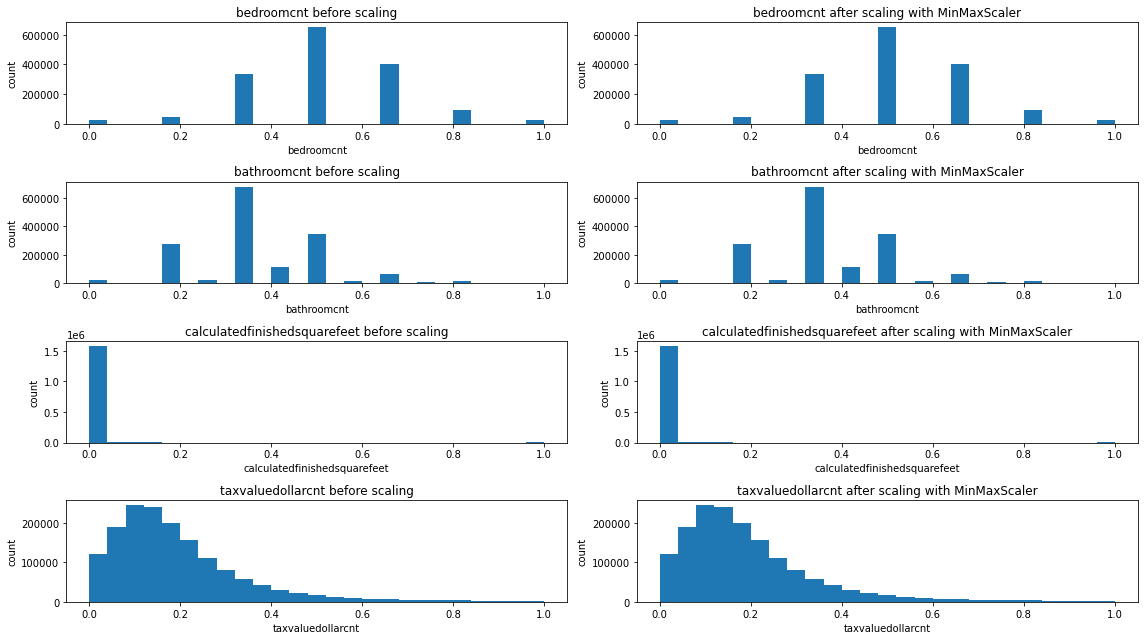

In [15]:
visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=25)

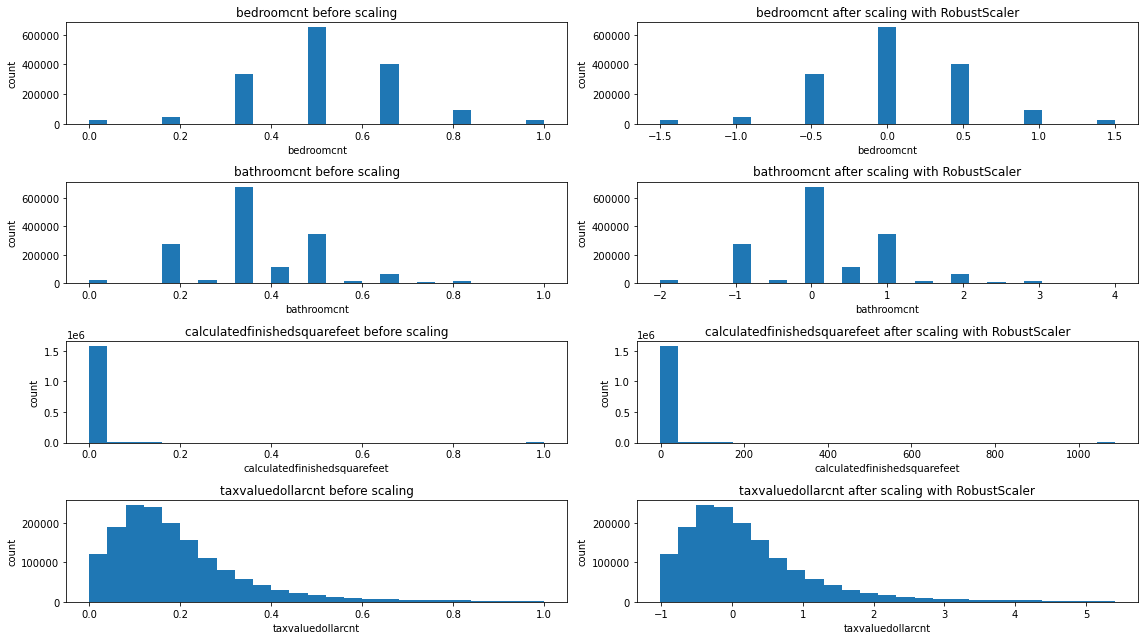

In [14]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=25)

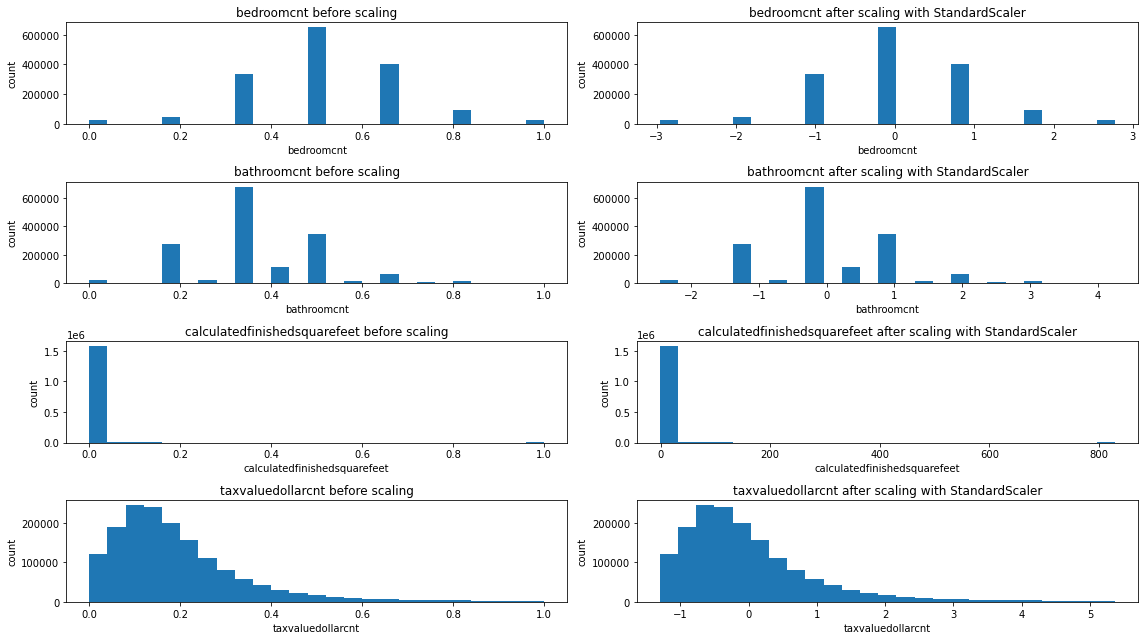

In [13]:
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=25)

In [ ]:
#2.) Apply the .inverse_transform method to your scaled data. 
# Is the resulting dataset the exact same as the original data?

In [18]:
scaler.inverse_transform(train_s[columns_to_scale])

array([[2.000000e+00, 1.000000e+00, 1.266000e+03, 4.903400e+04],
       [2.000000e+00, 1.000000e+00, 8.170000e+02, 1.410030e+05],
       [3.000000e+00, 1.000000e+00, 1.176000e+03, 2.775220e+05],
       ...,
       [3.000000e+00, 3.000000e+00, 1.650000e+03, 4.233530e+05],
       [4.000000e+00, 3.000000e+00, 1.979000e+03, 6.599120e+05],
       [4.000000e+00, 2.000000e+00, 1.484000e+03, 1.125677e+06]])

In [31]:
scaler.inverse_transform(train_s[columns_to_scale]) == train[columns_to_scale]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
1080974,True,True,True,True
443986,True,True,True,True
499941,True,True,True,True
1095771,True,True,True,True
2146798,True,True,True,True
...,...,...,...,...
340897,True,True,True,True
2433305,True,True,True,True
1219023,True,True,True,True
1039781,True,True,True,True


In [ ]:
#3.) Read the documentation for sklearn's QuantileTransformer. 
# Use normal for the output_distribution and apply this scaler to your data. 
# Visualize the result of your data scaling.

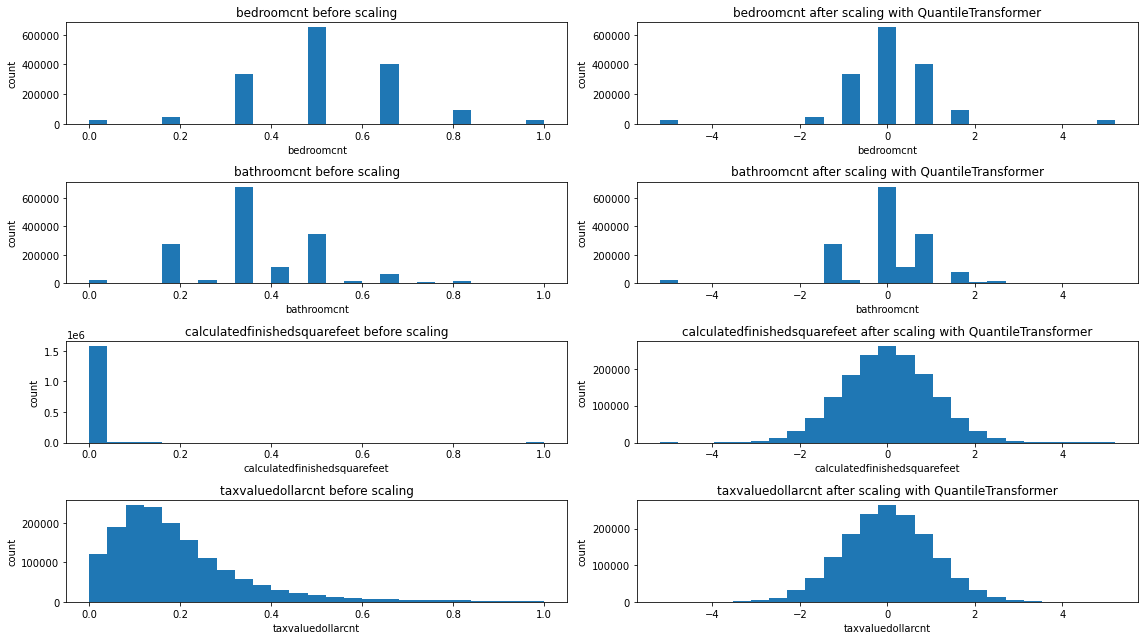

In [32]:
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=columns_to_scale, bins=25)

In [ ]:
#4.) Use the QuantileTransformer, but omit the output_distribution argument. 
# Visualize your results. What do you notice?

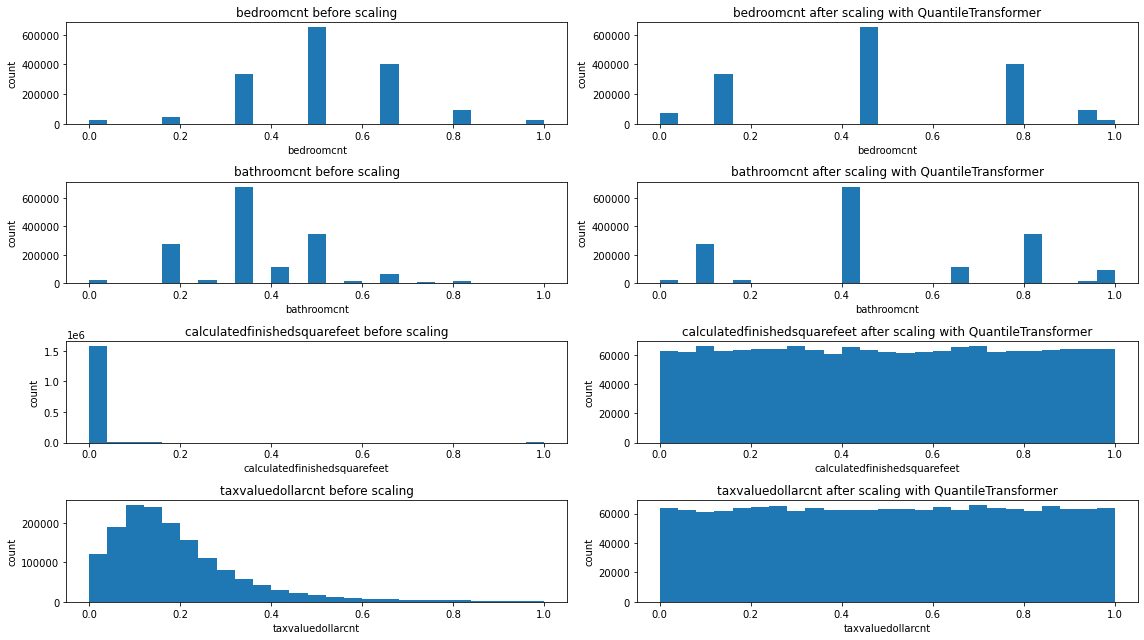

In [33]:
visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=columns_to_scale, bins=25)

In [ ]:
#5.) Based on the work you've done, choose a scaling method for your dataset. 
# Write a function within your prepare.py that accepts as input the train, validate, and test data splits,
# and returns the scaled versions of each. 
# Be sure to only learn the parameters for scaling from your training data!

In [45]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
  
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
            columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
            columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
            columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [48]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [49]:
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1080974,0.333333,0.166667,0.001328,0.024506,1949,1143.74,6037
443986,0.333333,0.166667,0.000857,0.070491,1953,2070.03,6037
499941,0.500000,0.166667,0.001233,0.138752,1951,4805.56,6037
1095771,0.500000,0.333333,0.001468,0.171013,1947,4080.82,6037
2146798,0.500000,0.500000,0.002148,0.405586,2000,8085.66,6059
...,...,...,...,...,...,...,...
340897,0.666667,0.333333,0.002005,0.030305,1946,1100.53,6037
2433305,0.500000,0.333333,0.001822,0.054275,1950,1555.94,6059
1219023,0.500000,0.500000,0.001731,0.211668,2008,5156.46,6037
1039781,0.666667,0.500000,0.002076,0.329949,1947,9750.85,6037
